#Adam Moulton
Método Adam Moulton de 4 pasos para aproximación numérica de ecuaciones diferenciales \\

Como requerimos encontrar condiciones iniciales requerimos de otro método de orden 5

In [22]:
import math
from math import cos, sin, e, log
import numpy as np
import pandas as pd
import sympy as sp
from sympy import * 
import matplotlib.pyplot as plt
import scipy as sip
from scipy import integrate
from scipy.sparse import spdiags

**Sistema de Ecuaciones**
$\left\{ \begin{array}{lcc}
             y_1'= 9y_1+24y_2+5cost-\frac{1}{3}sint & t\in [0,1] 
             \\ y_2'= -24y_1-51y_2-9cost+\frac{1}{3}sint & t \in [0,1] 
             \\ y_1(0)= \frac{4}{3}, \;\;\; y_2(0)=\frac{2}{3} 
             \end{array}
   \right.$

In [23]:
##Sistema de ecuaciones
def function1(t, y1, y2):
  return 9*y1+24*y2+5*cos(t)-1/3*sin(t)
def function2(t, y1, y2):
  return -24*y1-51*y2-9*cos(t)+1/3*sin(t)

**Solución al PVI** $\left\{ \begin{array}{lcc}
             y_1 = 2e^{-3t}-e^{-39t}+\frac{1}{3}cos(t) & t\in [0,1] 
             \\ y_2= -e^{-3t}+2e^{-39t}-\frac{1}{3}cos(t) & t \in [0,1] 
             \end{array}
   \right.$

In [5]:
#Soluciones
def sol1(t):
  return 2*e**(-3*t)-e**(-39*t)+(1/3)*cos(t)
def sol2(t):
  return (-1)*e**(-3*t)+2*e**(-39*t)-(1/3)*cos(t)
def sol3(x,ep):
  return 1+x+(e**(x/ep)-1)/(e**(1/ep)-1)

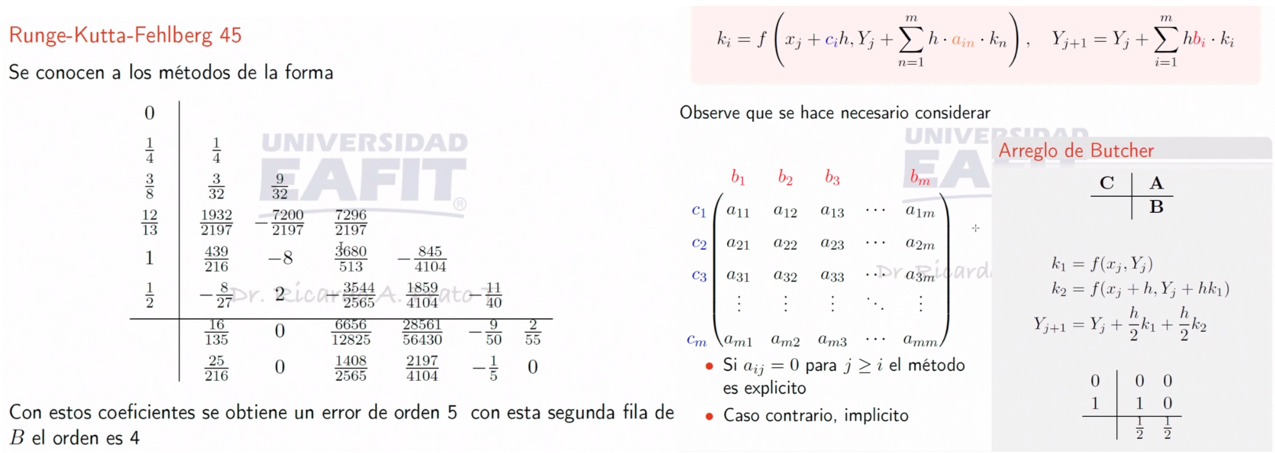

In [42]:
#Runge-Kutta 45 orden 5
def RK45(fun1, fun2,a,b,y10,y20,M, order):
  X = np.zeros(M+1)
  Y1 = np.zeros(M+1)
  Y2 = np.zeros(M+1)
  
  h = (b-a)/M
  X[0] = a
  Y1[0] = y10
  Y2[0] = y20
  i = 1
  while i<=M:
    X[i] = X[i-1]+h
    i = i +1
  k = 0
    
  while k<M:
    k1 = h*fun1(X[k],Y1[k], Y2[k])
    l1 = h*fun2(X[k],Y1[k], Y2[k])
    k2 = h*fun1(X[k] + 1/4*h,Y1[k]+1/4*k1, Y2[k]+1/4*l1)
    l2 = h*fun2(X[k] + 1/4*h,Y1[k]+1/4*k1, Y2[k]+1/4*l1)
    k3 = h*fun1(X[k]+ 3/8*h,Y1[k]+3/32*k1+9/32*k2,Y2[k]+3/32*l1+9/32*l2)
    l3 = h*fun2(X[k]+ 3/8*h,Y1[k]+3/32*k1+9/32*k2,Y2[k]+3/32*l1+9/32*l2 )
    k4 = h*fun1(X[k]+ 12/13*h,Y1[k]+1932/2197*k1-7200/2197*k2+7296/2197*k3, Y2[k]+1932/2197*l1-7200/2197*l2+7296/2197*l3)
    l4 = h*fun2(X[k]+ 12/13*h,Y1[k]+1932/2197*k1-7200/2197*k2+7296/2197*k3, Y2[k]+1932/2197*l1-7200/2197*l2+7296/2197*l3)
    k5 = h*fun1(X[k]+ h,Y1[k]+439/216*k1-8*k2+3680/513*k3-845/4101*k4, Y2[k]+439/216*l1-8*l2+3680/513*l3-845/4101*l4)
    l5 = h*fun2(X[k]+ h,Y1[k]+439/216*k1-8*k2+3680/513*k3-845/4101*k4, Y2[k]+439/216*l1-8*l2+3680/513*l3-845/4101*l4)
    k6 = h*fun1(X[k]+ 1/2*h,Y1[k]-8/27*k1+2*k2-3544/2565*k3+1859/4101*k4-11/40*k5, Y2[k]-8/27*l1+2*l2-3544/2565*l3+1859/4101*l4-11/40*l5)
    l6 = h*fun2(X[k]+ 1/2*h,Y1[k]-8/27*k1+2*k2-3544/2565*k3+1859/4101*k4-11/40*k5, Y2[k]-8/27*l1+2*l2-3544/2565*l3+1859/4101*l4-11/40*l5)
    if order == 5:
      Y1[k+1] = Y1[k] + 16/135*k1+6656/12825*k3+28561/56430*k4-9/50*k5+2/55*k6
      Y2[k+1] = Y2[k] + 16/135*l1+6656/12825*l3+28561/56430*l4-9/50*l5+2/55*l6
    elif order == 4:
      Y1[k+1] = Y1[k] + 25/216*k1+1408/2565*k3+2197/4101*k4-1/5*k5
      Y2[k+1] = Y2[k] + 25/216*l1+1408/2565*l3+2197/4101*l4-1/5*l5
    else:
      return "Se especificó un orden no permitido"
    k=k+1

  return X, Y1, Y2

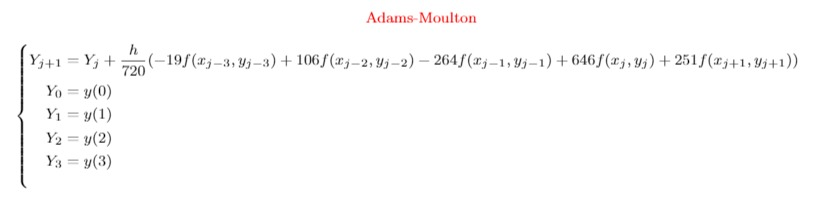

In [57]:
t3,t2,t1,t,t_1,yj31,yj21,yj1,y1j,y_j1,yj32,yj22,yj12,y2j,y_j2= symbols('t3,t2,t1,t,t_1,yj31,yj21,yj1,y1j,y_j1,yj32,yj22,yj12,y2j,y_j2')
def AMoulton(f1,f2,a,b,y10,y20,M):
  h = (b-a)/M
  Ys1= np.zeros(M+1)
  Ys2= np.zeros(M+1)
  X, Y1r,Y2r = RK45(f1,f2,a,b,y10,y20,M,5)
  Ys1[0:4]= Y1r[0:4]
  Ys2[0:4]= Y2r[0:4]
  X[0] = a

  fx2= y_j2-y2j-(h/720)*(-19*f2(t3,yj31,yj32)+106*f2(t2,yj21,yj22)-264*f2(t1,yj1,yj12)+646*f2(t,y1j,y2j)+251*f2(t_1,y_j1,y_j2))
  fx2= solve(fx2,y_j2)[0]
    
  fx1= y_j1-y1j-(h/720)*(-19*f1(t3,yj31,yj32)+106*f1(t2,yj21,yj22)-264*f1(t1,yj1,yj12)+646*f1(t,y1j,y2j)+251*f1(t_1,y_j1,y_j2))
  fx1= solve(fx1.subs(y_j2,fx2),y_j1)[0]

  i=3
  while i<M:
    Ys1[i+1]= fx1.subs(t3,X[i-3]).subs(t2,X[i-2]).subs(t1,X[i-1]).subs(t,X[i]).subs(t_1,X[i+1]).subs(yj32,Ys2[i-3]).subs(yj31,Ys1[i-3]).subs(yj22,Ys2[i-2]).subs(yj21,Ys1[i-2]).subs(yj12,Ys2[i-1]).subs(yj1,Ys1[i-1]).subs(y2j,Ys2[i]).subs(y1j,Ys1[i])
    Ys2[i+1]= fx2.subs(t3,X[i-3]).subs(t2,X[i-2]).subs(t1,X[i-1]).subs(t,X[i]).subs(t_1,X[i+1]).subs(yj32,Ys2[i-3]).subs(yj31,Ys1[i-3]).subs(yj22,Ys2[i-2]).subs(yj21,Ys1[i-2]).subs(yj12,Ys2[i-1]).subs(yj1,Ys1[i-1]).subs(y_j1,Ys1[i+1]).subs(y2j,Ys2[i]).subs(y1j,Ys1[i])
    i=i+1
  
  return X, Ys1, Ys2

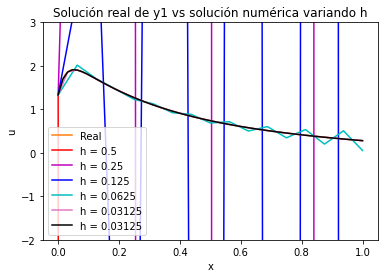

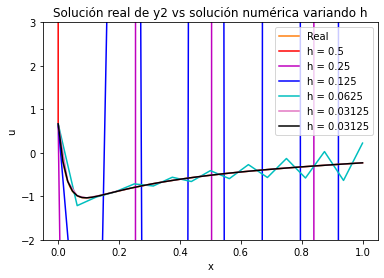

In [58]:
#Gráficar

#Solución real:

x = np.linspace(0,1,1000)
y1real = np.zeros(len(x))
y2real = np.zeros(len(x))
Xp, Y1p, Y2p= AMoulton(function1,function2,0,1,4/3,2/3,2)
Xs, Y1s, Y2s= AMoulton(function1,function2,0,1,4/3,2/3,4)
Xt, Y1t, Y2t= AMoulton(function1,function2,0,1,4/3,2/3,8)
Xc, Y1c, Y2c= AMoulton(function1,function2,0,1,4/3,2/3,16)
Xq, Y1q, Y2q = AMoulton(function1,function2,0,1,4/3,2/3,32)
Xo, Y1o, Y2o= AMoulton(function1,function2,0,1,4/3,2/3,64)

for i in range(len(x)):
  y1real[i] = sol1(x[i])
  y2real[i] = sol2(x[i])

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)


# plot the function
plt.plot(x,y1real, 'C1')
plt.title('Solución real de y1 vs solución numérica variando h')
plt.xlabel('x')
plt.ylabel('u')
plt.plot(Xp,Y1p, 'r')
plt.plot(Xs,Y1s, 'm')
plt.plot(Xt,Y1t, 'b')
plt.plot(Xc,Y1c, 'c')
plt.plot(Xq,Y1q, 'C6')
plt.plot(Xo,Y1o, 'k')
plt.ylim(top = 3, bottom = -2)
plt.legend(["Real", "h = "+ str(2**(-1)), "h = "+ str(2**(-2)), "h = "+ str(2**(-3)), "h = "+ str(2**(-4)),"h = "+ str(2**(-5)) ,"h = "+ str(2**(-5))], loc ="lower left")
plt.show()

plt.plot(x,y2real, 'C1')
plt.title('Solución real de y2 vs solución numérica variando h')
plt.xlabel('x')
plt.ylabel('u')
plt.plot(Xp,Y2p, 'r')
plt.plot(Xs,Y2s, 'm')
plt.plot(Xt,Y2t, 'b')
plt.plot(Xc,Y2c, 'c')
plt.plot(Xq,Y2q, 'C6')
plt.plot(Xo,Y2o, 'k')
plt.ylim(top = 3, bottom = -2)
plt.legend(["Real", "h = "+ str(2**(-1)), "h = "+ str(2**(-2)), "h = "+ str(2**(-3)), "h = "+ str(2**(-4)),"h = "+ str(2**(-5)) ,"h = "+ str(2**(-5))], loc ="upper right")
plt.show() 

In [59]:
#Calcular error
def error(fun1, fun2,sol1, sol2,a,b,y10,y20,M):
  Error1= np.zeros(M+1)
  Error2= np.zeros(M+1)
  h = (a-b)/M
  X, Y1, Y2 = AMoulton(fun1, fun2, a, b, y10, y20, M)
  Datos=[]
  i = 0
  while i<=M:
    Error1[i] = abs(Y1[i]-sol1(X[i]))
    Error2[i] = abs(Y2[i]-sol2(X[i]))
    Datos.append([X[i],Y1[i],Error1[i],Y2[i],Error2[i]])
    i = i+1
  Datos = pd.DataFrame(Datos).set_axis(['X','Y1','Error Y1','Y2','Error Y2'], axis=1)
  ## Error
  error = 0
  for i in range(1,M+1):
    l1i = lambda x: Y1[i-1]+((x-X[i-1])/h)*(Y1[i]-Y1[i-1])
    l2i =  lambda x: Y2[i-1]+((x-X[i-1])/h)*(Y2[i]-Y2[i-1])
    integrando = lambda x: (sol1(x)-l1i(x))**2 + (sol2(x)-l2i(x))**2
    integral= integrate.quad(integrando, X[i-1], X[i])
    error = error + integral[0]
  error = sqrt(error)
  return error

In [60]:
def alpha():
  Errorh = np.zeros(6)
  hs = np.zeros(6)
  alphas = np.zeros(6)
  Datos = []
  M = 2
  Errorh[0] = error(function1,function2,sol1,sol2,0,1,4/3,2/3,M)
  hs[0] = 1/M
  Datos.append([hs[0],Errorh[0],nan])
  for i in range(1,6):
    M=M*2
    h = 1/M
    Errorh[i] = error(function1,function2,sol1,sol2,0,1,4/3,2/3,M)
    hs[i] = h
    alphas[i] = log(Errorh[i]/Errorh[i-1])/log(hs[i]/hs[i-1])
    Datos.append([hs[i],Errorh[i],alphas[i]])
  Datos = pd.DataFrame(Datos).set_axis(['h','Eh','alpha'], axis=1) 
  return Datos,Errorh, hs

In [61]:
Datos, errorh, hs = alpha()
Datos

,h,Eh,alpha
0,0.500000,5.684443e+07,nan
1,0.250000,6.512765e+05,6.447605
2,0.125000,1.416991e+03,8.844296
3,0.062500,7.724028e-01,10.84119
4,0.031250,3.317753e-01,1.219147
5,0.015625,1.680223e-01,0.981553


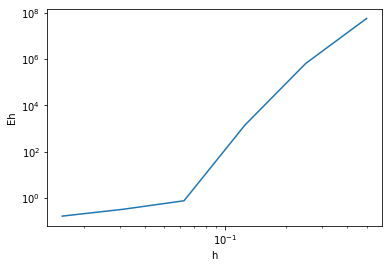

In [62]:
##Gráficas loglog
plt.loglog(hs,errorh)
plt.xlabel('h')
plt.ylabel('Eh')
plt.show()